In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 18kB/s 
     |████████████████████████████████| 4.0MB 49.2MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.4.0 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: torchvision 0.9.1+cu101
    Uninstalling torchvision-0.9.1+cu101:
      Successfully uninstalled torchvision-0.9.1+cu101


In [ ]:
TO CONNECT WITH DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## COLLECTING AND TRANSFORMING DATASET

In [ ]:
from fastai.vision import *
from fastai.metrics import *
import tensorflow as tf

In [ ]:
path = Path("/content/drive/MyDrive/Superset")

In [ ]:
np.random.seed(41)
data = ImageDataBunch.from_folder(path, valid_pct=0.25,
        ds_tfms=get_transforms(), size=(224,224), bs=32, num_workers=4).normalize()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


CHECKING THE TRAIN-TEST SPLIT

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['0', '1'], 2, 1022, 340)

In [ ]:
print("Number of examples in training:", len(data.train_ds))
print("Number of examples in validation:", len(data.valid_ds))

Number of examples in training: 1022
Number of examples in validation: 340


In [ ]:
xb,yb = data.one_batch()
xb.shape,yb.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

FOR VIEWING BATCHES OF IMAGES

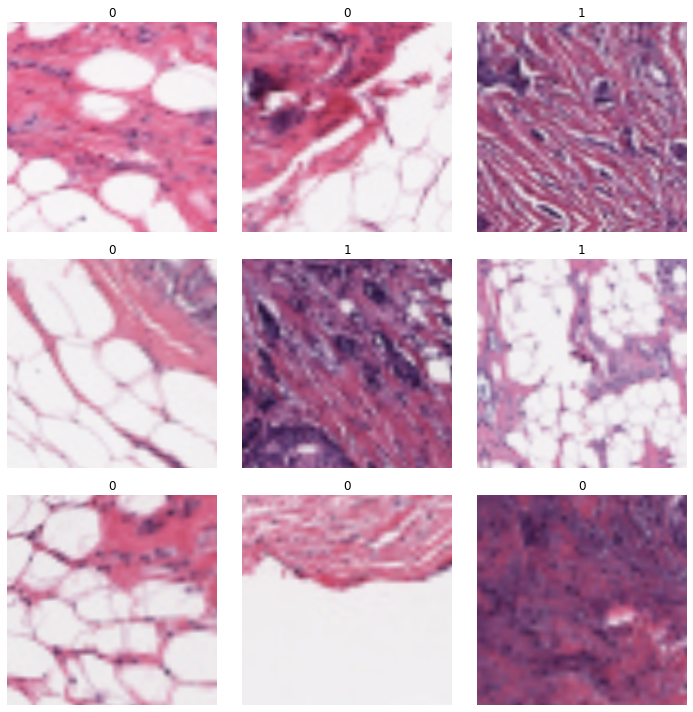

In [ ]:
data.show_batch(rows=3, figsize=(10,10))

FOR LOADING DL MODEL

In [ ]:
#here models.vgg16_bn is for vgg 16 for other others use models."NAMEOFMODEL"
learn = cnn_learner(data, models.vgg16_bn, metrics=accuracy) 

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


FOR RUNNING DL MODEL

In [ ]:
#here 50 is number of epochs
learn.fit_one_cycle(50)

epoch,train_loss,valid_loss,accuracy,time
0,0.880859,0.495513,0.782353,01:16
1,0.757372,0.383053,0.847059,00:14
2,0.623609,0.279538,0.900000,00:14
3,0.576244,0.289503,0.888235,00:15
4,0.549043,0.222802,0.914706,00:14
5,0.486652,0.233673,0.900000,00:15
6,0.448174,0.278761,0.914706,00:14
7,0.423029,0.225553,0.911765,00:14
8,0.396579,0.188455,0.935294,00:14
9,0.390578,0.188329,0.932353,00:15


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


FOR METRICS LIKE CONVERGENCE PLOT ETC

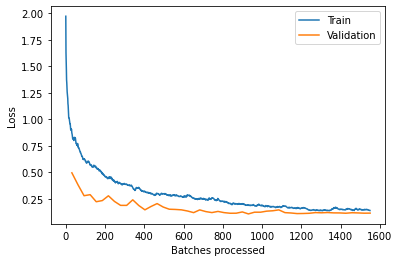

In [ ]:
learn.recorder.plot_losses()

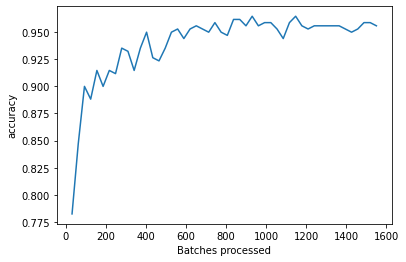

In [ ]:
learn.recorder.plot_metrics()

FOR CONFUSION MATRIX

In [ ]:
interp = ClassificationInterpretation.from_learner(learn, ds_type=DatasetType.Valid)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


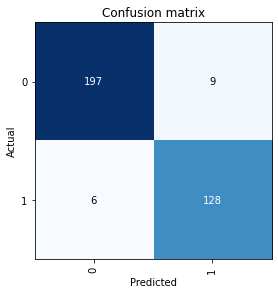

In [ ]:
cm_fig = interp.plot_confusion_matrix(return_fig=True)
ax = cm_fig.gca()
ax.set_ylim(interp.data.c - .5, - .5);